In [3]:
# essas duas linhas e para te permitir atualizar codigo no vscode automaticamente e usar aqui no jupyter sem ter que
# reimportar
%load_ext autoreload
%autoreload 2

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

# Custom imports
from models import *

In [18]:
# carregando dados de treino
df_x = pd.read_csv("./dataset/Training/TrainingAccZAxis.txt", header=None)
df_x.columns =[ "AccZAxis"]
df_y = pd.read_csv("./dataset/Training/TrainingStepsOrNot.txt", header=None)
df_y.columns =[ "Step"]

# carregando dados de teste
df_x_test = pd.read_csv("./dataset/Testing/TestingAccZAxis.txt", header=None
df_x_test.columns =[ "AccZAxis"]
df_y_test = pd.read_csv("./dataset/Testing/TestingStepsOrNot.txt", header=None)
df_y_test.columns =[ "Step"]

SyntaxError: invalid syntax (2524530892.py, line 9)

In [26]:
import numpy as np
# carregando dados de treino
df_x = np.loadtxt("./dataset/TRAINING_matrixX.txt", delimiter=" ")
df_y = np.loadtxt("./dataset/TRAINING_matrixy.txt", delimiter=" ")


# # carregando dados de teste
# df_x_test = pd.read_csv("./dataset/Testing/TRAINING_matrixy.txt", header=None)
# df_x_test.columns =[ "AccZAxis"]
# df_y_test = pd.read_csv("./dataset/Testing/TestingStepsOrNot.txt", header=None)
# df_y_test.columns =[ "Step"]

In [27]:
print(df_x)
print(df_x.shape)
print(df_y)
print(df_y.shape)

[[-0.7493545  -0.783301   -1.641174    0.02528447 -0.03394645 -0.8578734 ]
 [-0.783301   -1.641174   -0.890356   -0.03394645 -0.8578734   0.7508184 ]
 [-1.641174   -0.890356   -0.8476255  -0.8578734   0.7508184   0.04273051]
 ...
 [-0.824415   -0.8411595  -0.682224   -0.245708   -0.01674449  0.1589355 ]
 [-0.890356   -0.8476255  -0.796233    0.7508184   0.04273051  0.0513925 ]
 [-0.7403265  -0.705526   -0.6143615  -0.04285246  0.03480047  0.09116447]]
(6000, 6)
[1. 1. 1. ... 0. 0. 0.]
(6000,)


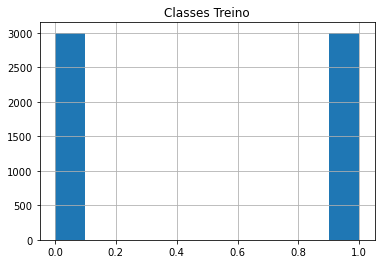

In [14]:
# visualizando uma distribuicao de classes nos dados de treino e teste
df_y.hist()
plt.title("Classes Treino")
plt.show()
# df_y_test.hist()
# plt.title("Classes Teste")
# plt.show()

In [15]:
# Preprocessing 1
# preprocessing basico dos dados (acertando a shape para fazer fit nos modelos)
# X_train, y_train = df_x.values.ravel(), df_y.values.ravel()
# X_train = X_train.reshape(-1,1,6)
# # scale training data to [-1,1]
# X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

# X_test, y_test = df_x_test.values.ravel(), df_y_test.values.ravel()
# X_test = X_test.reshape(-1,1,1)
# # scale testing data to [-1,1]
# X_test = (X_test - X_test.min()) / (X_test.max() - X_test.min())

# Preprocessing 2 with window size


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [16]:
X_train = df_x.reshape(-1,1,6)
# scale training data to [-1,1]
X_train = (X_train - X_train.min()) / (X_train.max() - X_train.min())

array([[['-0.7493545 -0.783301 -1.641174 0.02528447 -0.03394645 -0.8578734',
         '-0.783301 -1.641174 -0.890356 -0.03394645 -0.8578734 0.7508184',
         '-1.641174 -0.890356 -0.8476255 -0.8578734 0.7508184 0.04273051',
         '-0.6177775 -0.8773935 -1.062346 0.005246043 -0.259616 -0.184952',
         '-0.8773935 -1.062346 -0.9705405 -0.259616 -0.184952 0.09180504',
         '-1.062346 -0.9705405 -0.6171675 -0.184952 0.09180504 0.353373']],

       [['-0.71309 -0.8338395 -0.940986 0.0324825 -0.1207495 -0.1071464',
         '-0.8338395 -0.940986 -1.269471 -0.1207495 -0.1071464 -0.328485',
         '-0.940986 -1.269471 -0.795867 -0.1071464 -0.328485 0.473604',
         '-0.8377435 -1.033767 -1.714527 -0.1683295 -0.1960235 -0.68076',
         '-1.033767 -1.714527 -0.5073065 -0.1960235 -0.68076 1.207221',
         '-1.714527 -0.5073065 -0.7434985 -0.68076 1.207221 -0.236192']],

       [['-0.790865 -1.028643 -1.489803 -0.01671404 -0.237778 -0.4611599',
         '-1.028643 -1.48980

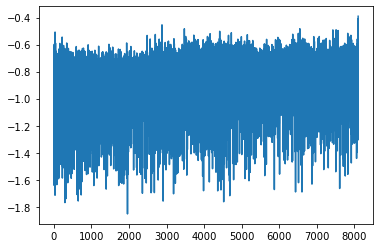

In [32]:
plt.plot(X_train[:,0,0])
plt.show()

In [9]:
# inicializando os modelos
lr = LogisticRegression()
rf = RandomForestClassifier()
lstm = lstm_model(n_timesteps=1, n_features=1, n_outputs=1)

# fazendo fit do modelo random forest
# referencia para entender random forest classifiers: https://towardsdatascience.com/understanding-random-forest-58381e0602d2
# rf.fit(X_train, y_train)
# lr.fit(X_train,y_train)
epochs = 5
batch_size = 64
lstm.fit(X_train, y_train, epochs=epochs,batch_size=batch_size, verbose=1)

2021-12-27 14:48:24.906873: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-12-27 14:48:24.925416: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2599990000 Hz


Epoch 1/5
127/127 [==============================] - 1s 2ms/step - loss: 0.6597 - accuracy: 0.6292
Epoch 2/5
127/127 [==============================] - 0s 2ms/step - loss: 0.5991 - accuracy: 0.6469
Epoch 3/5
127/127 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8012
Epoch 4/5
127/127 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8327
Epoch 5/5
127/127 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8343


In [53]:
# source: https://keras.io/examples/timeseries/timeseries_transformer_classification/
from keras import layers
from models import *

n_classes = 1
epochs = 500

input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
    n_classes=n_classes,
)

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    batch_size=64,
    callbacks=callbacks,
)

model.evaluate(X_test, y_test, verbose=1)

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 1, 1)]       0                                            
__________________________________________________________________________________________________
layer_normalization_40 (LayerNo (None, 1, 1)         2           input_8[0][0]                    
__________________________________________________________________________________________________
multi_head_attention_20 (MultiH (None, 1, 1)         7169        layer_normalization_40[0][0]     
                                                                 layer_normalization_40[0][0]     
__________________________________________________________________________________________________
dropout_57 (Dropout)            (None, 1, 1)         0           multi_head_attention_20[0][

[0.7338070869445801, 0.49028077721595764]

In [64]:
# obtendo as predictions nos dados de teste
predictions_rf = rf.predict(X_test)
predictions_lr = lr.predict(X_test)

In [65]:
# obtendo a performance dos modelos

accuracy_score_rf = accuracy_score(y_test, predictions_rf)
accuracy_score_lr = accuracy_score(y_test, predictions_lr)

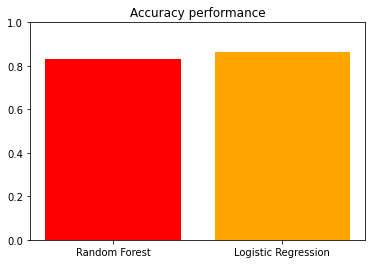

In [67]:
# visualizando as performances
import matplotlib.pyplot as plt
plt.bar(["Random Forest","Logistic Regression"],height=[accuracy_score_rf,accuracy_score_lr], color=["red","orange"])
plt.title("Accuracy performance")
plt.ylim(0,1)
plt.show()